## Looking at pairs of features & More about Table

In [2]:
# Import code libraries or "modules" in Python lingo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import sys
from datascience import *
sns.set_style("whitegrid")
%matplotlib inline

Everything about Table : http://data8.org/datascience/tables.html

In [3]:
t = Table()
t

Convert pandas datadrame into a table.

In [ ]:
Table.from_df(df)

Convet a structured NUmpy array into a table.

In [ ]:
Table.from_array(arr)

In [6]:
titanic = Table.read_table("titanic3.csv")
titanic.show(5)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,nan,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,nan,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [7]:
t.with_columns([
    "A", [1,2,3,],
    "B", [4,5,6]
])

A,B
1,4
2,5
3,6


1. Pair of Categorical features

In [28]:
# USE PIVOT METHOD
# xxx.pivot("Becomes column", "Becomes row")
titanic.pivot("survived","pclass")

pclass,0.0,1.0,nan
2,158,119,0
nan,0,0,0
1,123,200,0
3,528,181,0


In [26]:
# How to forloop
x = []
for i in np.arange(1,10):
    x.append(i)
x


[1, 2, 3, 4, 5, 6, 7, 8, 9]

How to ignore NA or missing value

2 . Pair of categorical and numerical feature

In [19]:
xx = titanic.select("pclass", "age").group("pclass", np.nanmean)
xx

c:\users\jbsoo\appdata\local\programs\python\python36\lib\site-packages\datascience\tables.py:2663: RuntimeWarning: Mean of empty slice
  return column_fn(column)


pclass,age nanmean
1,39.1599
2,29.5067
3,24.8164
nan,nan


In [2]:
titanic.hist("age", group = "pclass", overlay= False, bins= np.arange(0, 90))
# you can also add side_by_side = True to see all the bars in one chart

NameError: name 'titanic' is not defined

If we analyse pclass given age, the number will be very small to distinguish. 
Strategy : frequency, portion. Use percentage to evaluate.

In [27]:
# Return evenly spaced numbers over a specified interval.
np.linspace(1,50,4)


array([  1.        ,  17.33333333,  33.66666667,  50.        ])

3.Looking at the Pari of numerical features

In [29]:
galton = Table.read_table("http://inferentialthinking.com/notebooks/galton.csv")

In [33]:
galton = galton.relabeled(1, "fat_hei").relabeled(2, "mom_hei").relabeled(3, "mid_hei") \
         .relabeled(7, "chi_hei")

The mid parentsheight is not the mean of father height and mother height,
but it is (fatherheight) + 1.08 * motherheight. 
We found number 1.08 by comparing the std of two columns and equalizing it.
Equalizing the std provides better results and help both mother and father to have same influence on the mid height.

In [ ]:
fat_hei_std = np.std(galton.column("fat_hei"))
mom_hei_std = np.std(galton.column("mom_hei"))
fat_hei_std / mom_hei_std

### When comparing two numerical valuse, Use scatter plot!!!!!!!!!!

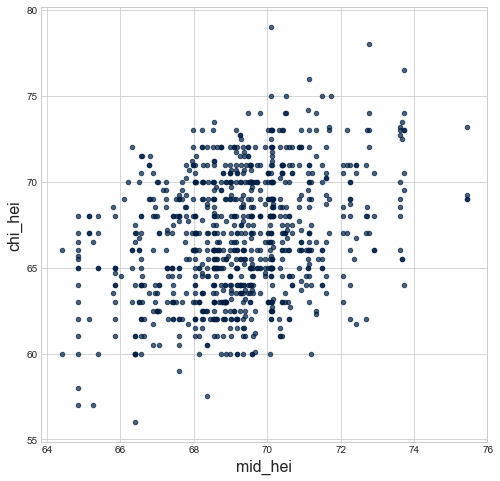

In [36]:
galton.scatter("mid_hei", "chi_hei", height= 8, width= 8)

In [ ]:
# When you want to call row, use
.item(0)